In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [50]:
datContent = [i.strip().split() for i in open("block.txt").readlines()]

# write it as a new CSV file
with open("flash_block.csv", "w") as f:
    writer = csv.writer(f)


    writer.writerows(datContent)


    
colnames=['A','B','C','D','E','F'] 

df=pd.read_csv("flash_block.csv",names=colnames,header=None,delimiter=',')
block=df['F']

In [51]:
datContent = [i.strip().split() for i in open("non_4l.txt").readlines()]

# write it as a new CSV file
with open("flash_block.csv", "w") as f:
    writer = csv.writer(f)


    writer.writerows(datContent)


colnames=['A','B','C','D','E','F'] 

df=pd.read_csv("flash_block.csv",names=colnames,header=None,delimiter=',')
non_block=df['F']

In [52]:
iter1=6
iter2=6

In [53]:
result_block=[0.0]*int(len(block)/iter1)
result_non_block=[0.0]*int(len(non_block)/iter2)

In [54]:
print(len(result_block),len(result_non_block))

320 320


In [55]:
step=int(len(block)/iter1)
for j in range(0,iter1):
    count=0
    for i in range(j*step,(j+1)*step):
        result_block[count]+=float(block[i])/(1000000.00)
        count+=1
step=int(len(non_block)/iter2)
for j in range(0,iter2):
    count=0
    for i in range(j*step,(j+1)*step):
        result_non_block[count]+=float(non_block[i])/(1000000.00)
        count+=1
for i in range(0,step):
    result_block[i]/=(iter1)
    result_non_block[i]/=(iter2)

In [56]:
print(len(result_block),len(result_non_block))

320 320


In [57]:
block_send=[]
block_sendrecv=[]
block_recv=[]
block_wait=[]
block_reduce=[]

for i in range(0,len(result_block),5):
    block_send.append(result_block[i])
    block_sendrecv.append(result_block[i+1])
    block_recv.append(result_block[i+2])
    block_wait.append(result_block[i+3])
    block_reduce.append(result_block[i+4])

In [58]:
non_block_send=[]
non_block_sendrecv=[]
non_block_recv=[]
non_block_wait=[]
non_block_reduce=[]

for i in range(0,len(result_non_block),5):
    non_block_send.append(result_non_block[i])
    non_block_sendrecv.append(result_non_block[i+1])
    non_block_recv.append(result_non_block[i+2])
    non_block_wait.append(result_non_block[i+3])
    non_block_reduce.append(result_non_block[i+4])

In [59]:
def plot_fcn():
    label_x=[]
    count=0
    for i in range(0,64):
        label_x.append(int(count))
        count+=1
    plt.figure(figsize=(20,15),dpi=200)
    plt.rcParams.update({'font.size': 46})
    plt.xticks(fontsize=46)
    
    plt.yticks(fontsize=46)
    
    
    plt.plot(label_x,block_sendrecv,color = 'red',linestyle='solid',label='sendrecv',linewidth=3)
    plt.plot(label_x,non_block_send,color = 'blue',linestyle='solid',label='send',linewidth=3)
    plt.plot(label_x,non_block_wait,color = 'green',linestyle='solid',label='wait',linewidth=3)
    plt.plot(label_x,non_block_recv,color = 'magenta',linestyle='solid',label='recv',linewidth=3)
    plt.ylim(bottom=0) 
    plt.xlim(left=0)
    
        
    plt.xlabel("Rank of Processes (8node,8ppn)",fontsize=46)
    plt.ylabel("Time (sec)",fontsize=46)
    plt.title("Time vs Rank of Processes (four-leader case)",fontsize=46)
    #plt.legend(loc='upper right')
    plt.legend(loc='center right')
    plt.savefig("defaultvs1l.jpg")
    plt.show()


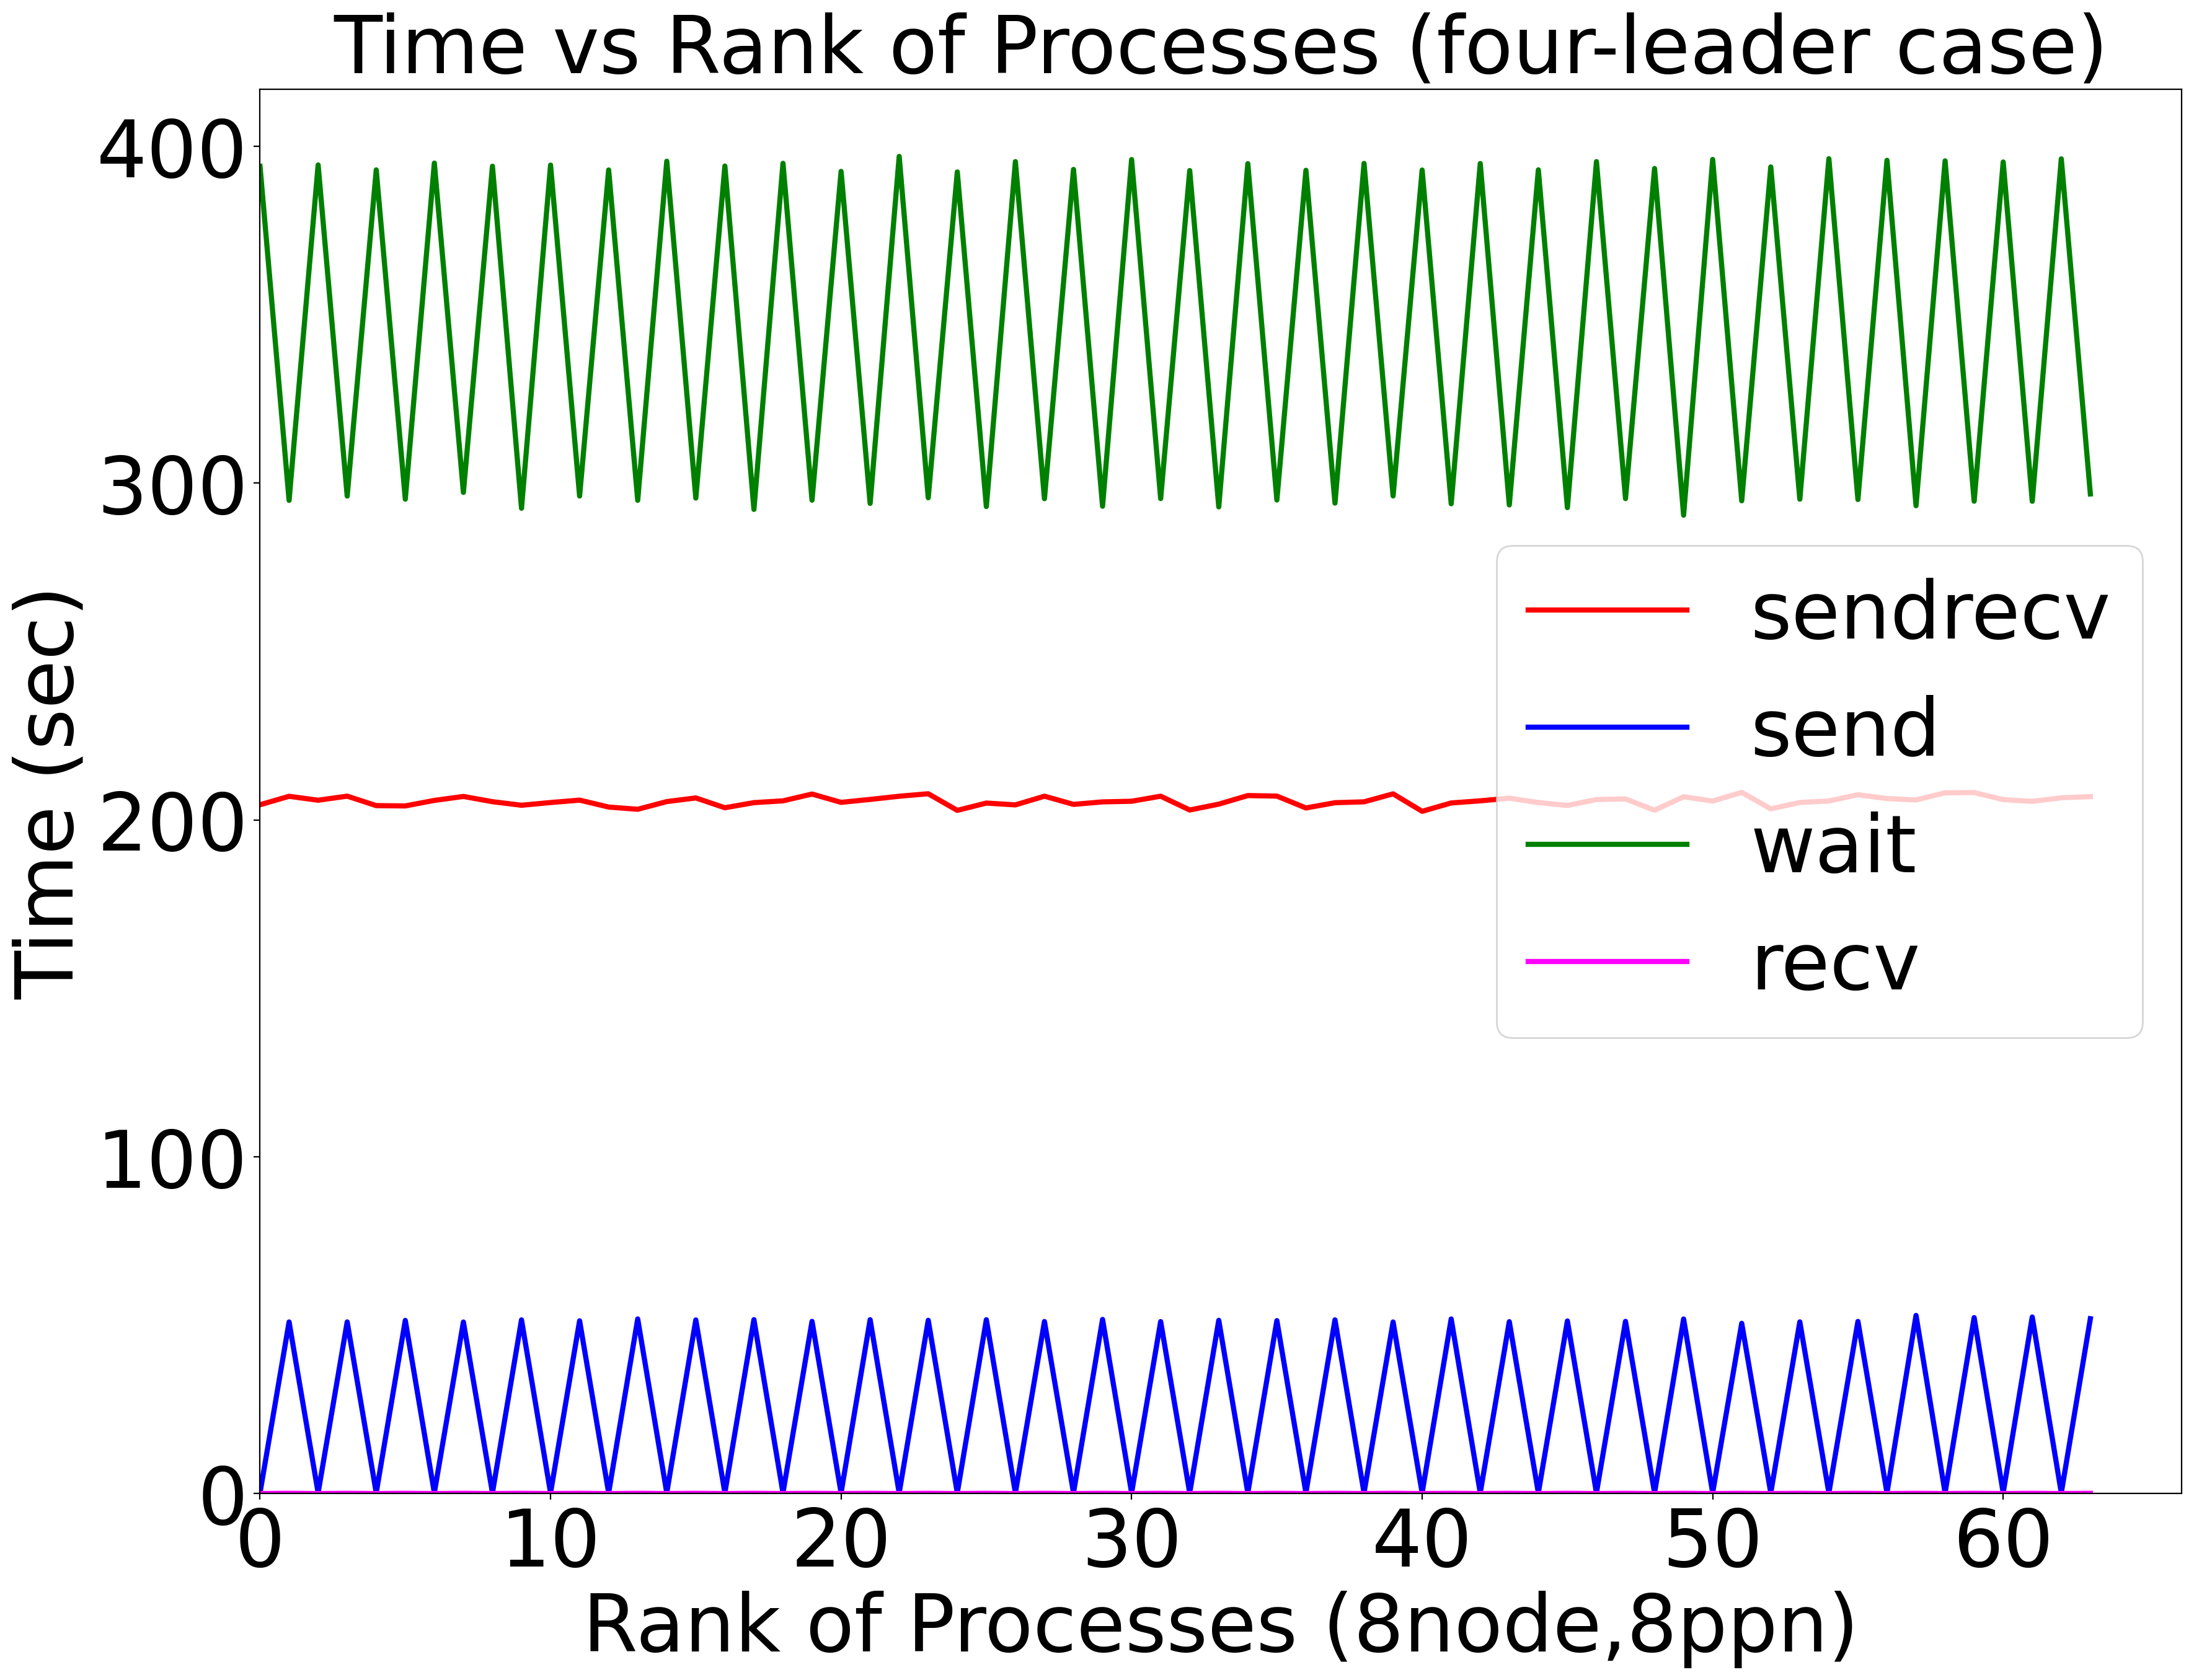

In [60]:
plot_fcn()